## YouTube Trends Germany Analysis

This notebook dives into the YouTube Trends from Germany in order to understand the Germany video pattern

### Data importing and preprocessing with Pandas¶

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_yt = pd.read_csv("DEvideos.csv") #Load data

In [3]:
df_yt.head(5) #check first 5 columns for data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [4]:
df_yt.tail(5) #check last 5 columns

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,[none],139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,False,False,False,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,False,False,False,Günter versucht sich als Ersthelfer bei einem ...
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,"Assassin's Creed|""Assassins Creed""|""Assassin's...",1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,False,False,False,"Vom verstoßenen Söldner zum legendären Helden,..."
40839,go-F6xvezAM,18.14.06,Гироскутер - Азбука Уральских Пельменей Б - Ур...,Уральские Пельмени,23,2018-06-13T15:02:15.000Z,"Гироскутер|""уральские пельмени гироскутер""|""мя...",316328,11394,352,550,https://i.ytimg.com/vi/go-F6xvezAM/default.jpg,False,False,False,Популярный номер из нового шоу Азбука Уральски...


In [5]:
df_yt.shape #display shape of the dataset

(40840, 16)

In [6]:
df_yt.nunique() #return Series with number of distinct observations

video_id                  29627
trending_date               205
title                     29682
channel_title              6085
category_id                  18
publish_time              28261
tags                      23557
views                     37916
likes                     17793
dislikes                   5108
comment_count              7579
thumbnail_link            29626
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               25617
dtype: int64

In [7]:
df_yt.info() #check for null values and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
video_id                  40840 non-null object
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### Data Exploration

Exploring if Views, Likes, Dislikes, and comment counts have a normal distribuition or not

#### Log Distribution

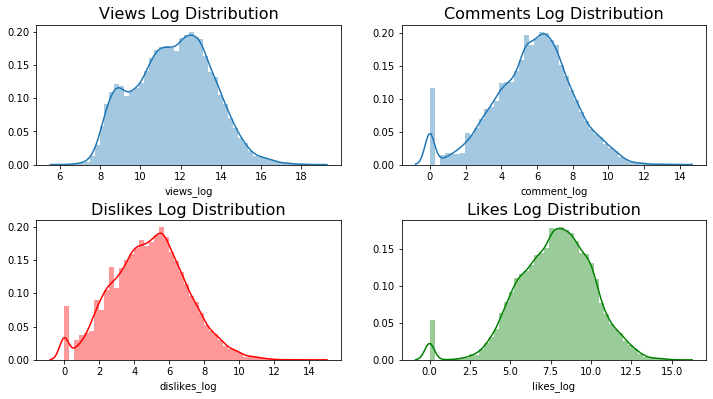

In [13]:
df_yt['likes_log'] = np.log(df_yt['likes'] + 1)
df_yt['views_log'] = np.log(df_yt['views'] + 1)
df_yt['dislikes_log'] = np.log(df_yt['dislikes'] + 1)
df_yt['comment_log'] = np.log(df_yt['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_yt['views_log'])
g1.set_title("Views Log Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_yt['likes_log'],color='green')
g2.set_title('Likes Log Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_yt['dislikes_log'], color='r')
g3.set_title("Dislikes Log Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_yt['comment_log'])
g4.set_title("Comments Log Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

#### Calculation of quantiles

In [14]:
print("Views quantiles")
print(df_yt['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_yt['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_yt['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_yt['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01       2713.78
0.25      27068.75
0.50     119277.00
0.75     443101.50
0.99    8063924.19
Name: views, dtype: float64

Likes quantiles
0.01         0.00
0.25       533.00
0.50      2699.00
0.75     11796.25
0.99    327344.27
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25       29.00
0.50      134.00
0.75      532.00
0.99    20380.81
Name: dislikes, dtype: float64

Comment quantiles
0.01        0.00
0.25       79.00
0.50      376.00
0.75     1376.00
0.99    36892.78
Name: comment_count, dtype: float64


#### Categorization

In [15]:
df_yt['category_name'] = np.nan

df_yt.loc[(df_yt["category_id"] == 1),"category_name"] = 'Film and Animation'
df_yt.loc[(df_yt["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_yt.loc[(df_yt["category_id"] == 10),"category_name"] = 'Music'
df_yt.loc[(df_yt["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_yt.loc[(df_yt["category_id"] == 17),"category_name"] = 'Sport'
df_yt.loc[(df_yt["category_id"] == 19),"category_name"] = 'Travel and Events'
df_yt.loc[(df_yt["category_id"] == 20),"category_name"] = 'Gaming'
df_yt.loc[(df_yt["category_id"] == 22),"category_name"] = 'People and Blogs'
df_yt.loc[(df_yt["category_id"] == 23),"category_name"] = 'Comedy'
df_yt.loc[(df_yt["category_id"] == 24),"category_name"] = 'Entertainment'
df_yt.loc[(df_yt["category_id"] == 25),"category_name"] = 'News and Politics'
df_yt.loc[(df_yt["category_id"] == 26),"category_name"] = 'How to and Style'
df_yt.loc[(df_yt["category_id"] == 27),"category_name"] = 'Education'
df_yt.loc[(df_yt["category_id"] == 28),"category_name"] = 'Science and Technology'
df_yt.loc[(df_yt["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_yt.loc[(df_yt["category_id"] == 25),"category_name"] = 'News & Politics'

### Data Visualization

### Counting Video Categories

Category Name count
Entertainment       15292
People and Blogs     5988
News & Politics      2935
Sport                2752
Comedy               2534
Name: category_name, dtype: int64


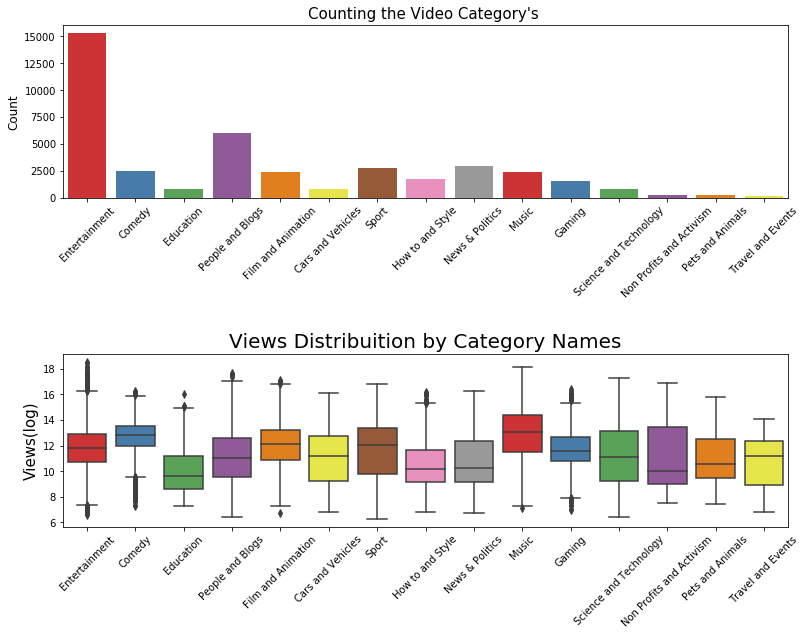

In [17]:
print("Category Name count")
print(df_yt.category_name.value_counts()[:5])

plt.figure(figsize = (13,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_yt, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

#### Likes distribution

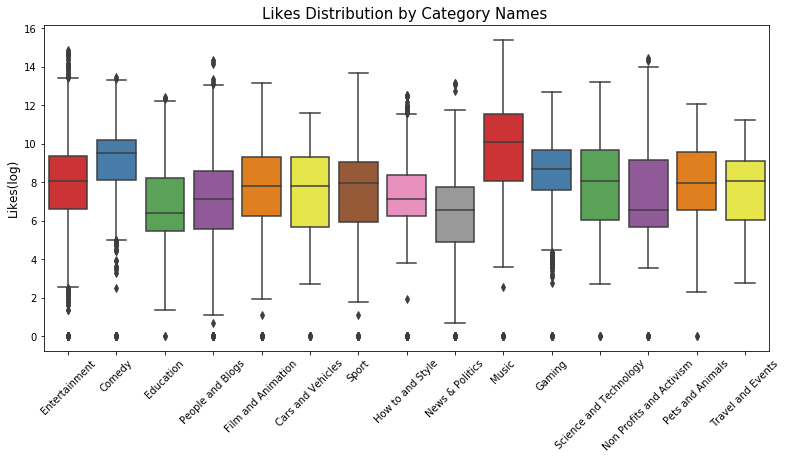

In [19]:
plt.figure(figsize = (13,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribution by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

#### Dislike distribution

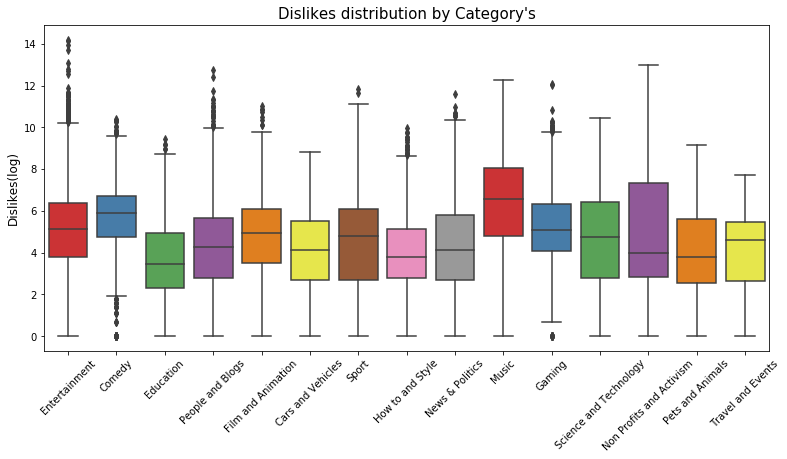

In [20]:
plt.figure(figsize = (13,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribution by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

#### Comments distribution

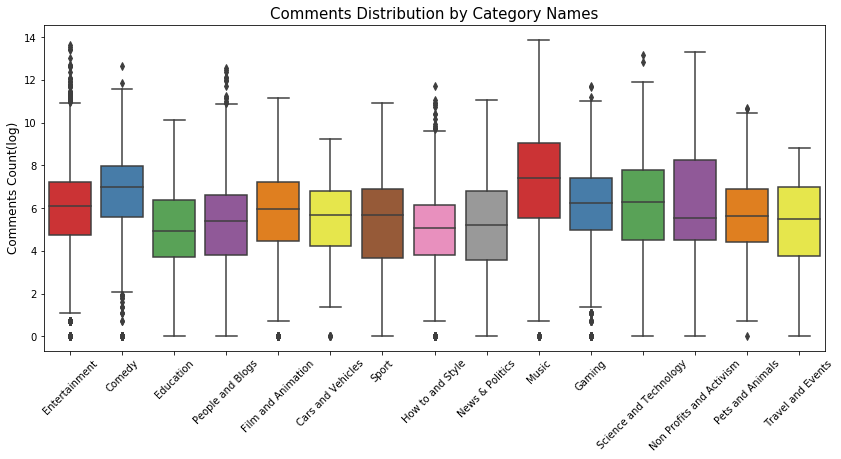

In [21]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribution by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

### Visualization of Rate Distribution

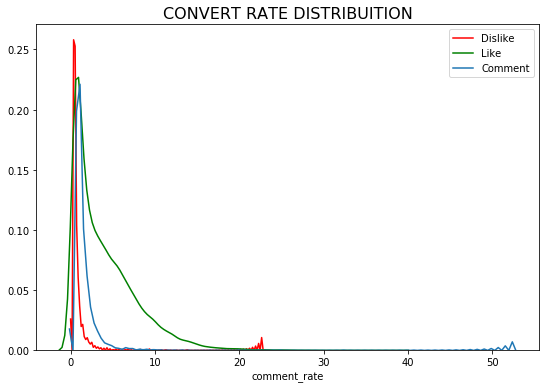

In [22]:
df_yt['like_rate'] =  df_yt ['likes'] / df_yt['views'] * 100
df_yt['dislike_rate'] =  df_yt ['dislikes'] / df_yt['views'] * 100
df_yt['comment_rate'] =  df_yt ['comment_count'] / df_yt['views'] * 100

plt.figure(figsize = (9,6))

g1 = sns.distplot(df_yt['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_yt['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_yt['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

####  Rate distributions

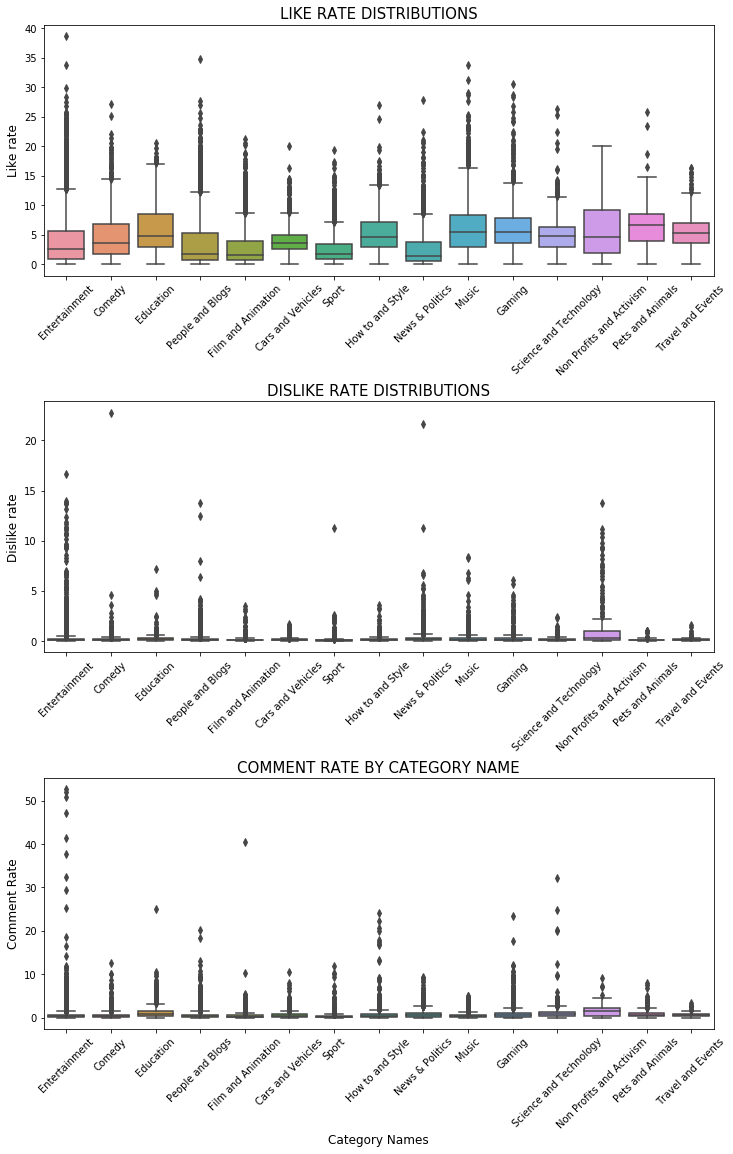

In [23]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_yt)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUTIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_yt)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUTIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_yt)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

### Exploring categorical variables

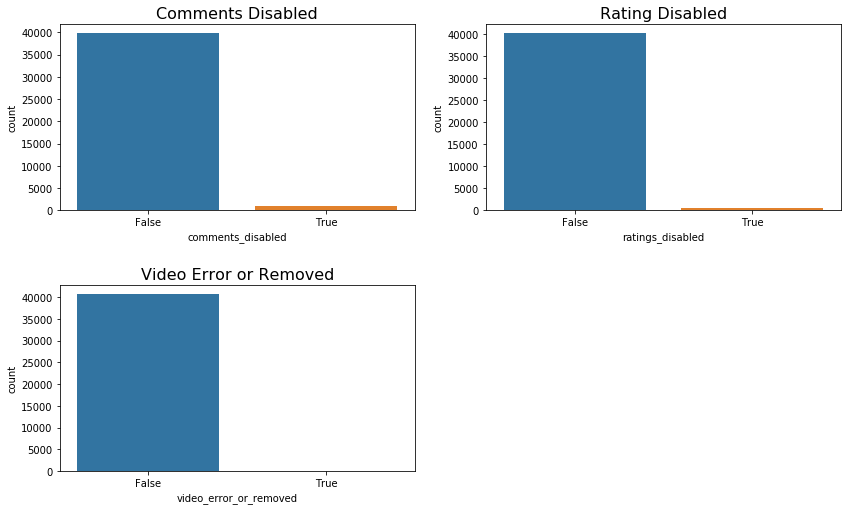

In [24]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_yt)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_yt)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_yt)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

In [25]:
df_yt['publish_time'] = pd.to_datetime(df_yt['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
3     6284
12    6215
5     6134
1     5697
2     5553
Name: month, dtype: int64


C:\Users\erenu\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


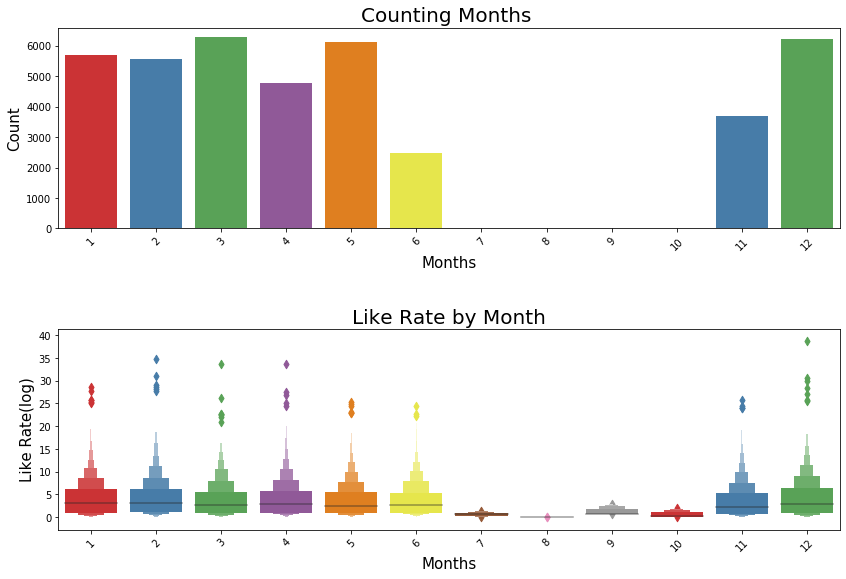

In [26]:
df_yt['month'] = df_yt['publish_time'].dt.month

print("Category Name count")
print(df_yt['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_yt, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

### Time Exploration

In [27]:
# separates date and time into two columns from 'publish_time' column
df_yt.insert(4, 'publish_date', df_yt['publish_time'].dt.date)
df_yt['publish_time'] = df_yt['publish_time'].dt.time
df_yt[['hour','min','sec']] = df_yt['publish_time'].astype(str).str.split(':', expand=True).astype(int)

17    3807
16    3501
15    3262
14    3203
18    2882
Name: hour, dtype: int64


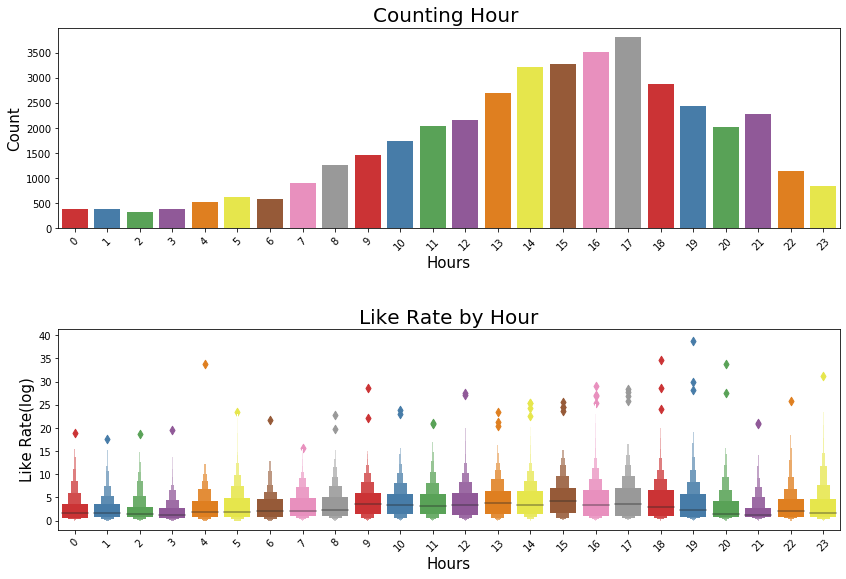

In [28]:
print(df_yt['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_yt, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_yt, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between sets of variables.

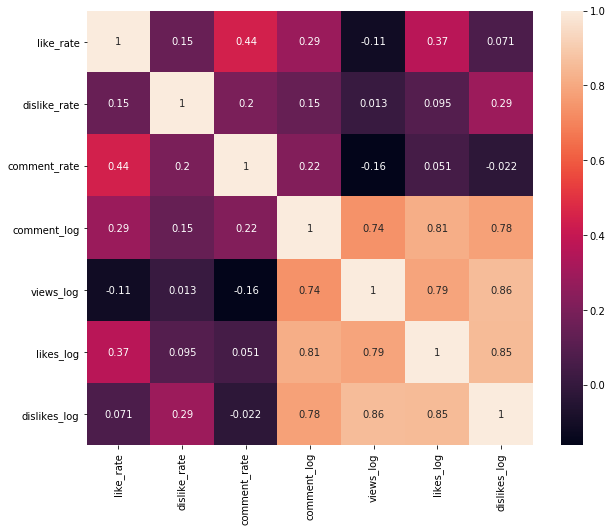

In [29]:
plt.figure(figsize = (10,8))

sns.heatmap(df_yt[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

### Word Cloud

Word Cloud is an electronic image that shows words used in a particular piece of electronic text or series of texts. The words are different sizes according to how often they are used in the text

In [30]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1

#### Rating Disabled

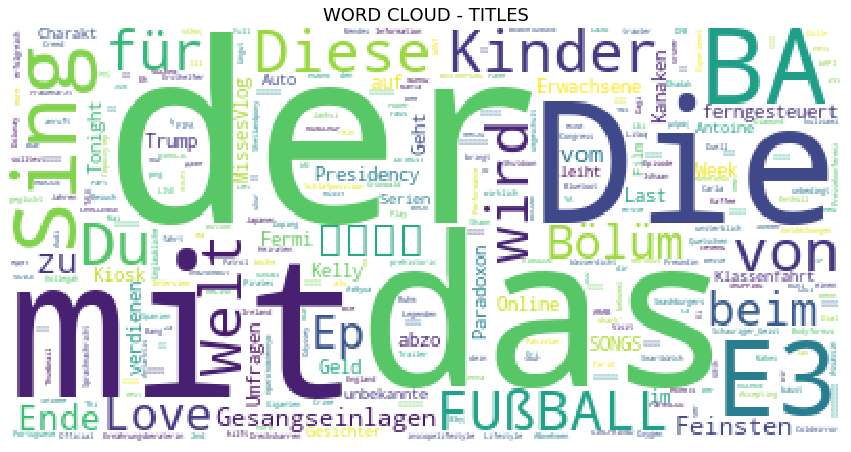

In [31]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
 background_color='white',
 stopwords=stopwords,
 max_words=1000,
 max_font_size=120, 
 random_state=42
                ).generate(str(df_yt['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Comments Disabled

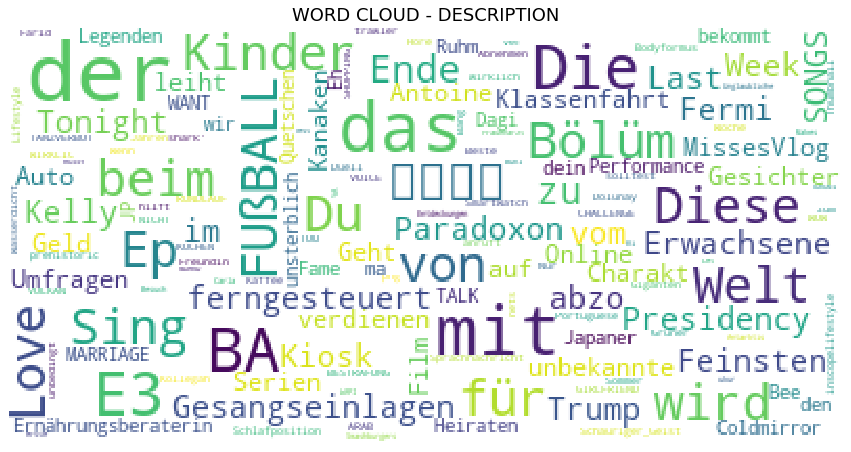

In [32]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
 background_color='white',
 stopwords=stopwords,
 max_words=150,
 max_font_size=40, 
 random_state=42
                         ).generate(str(df_yt['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

#### Word Cloud Description

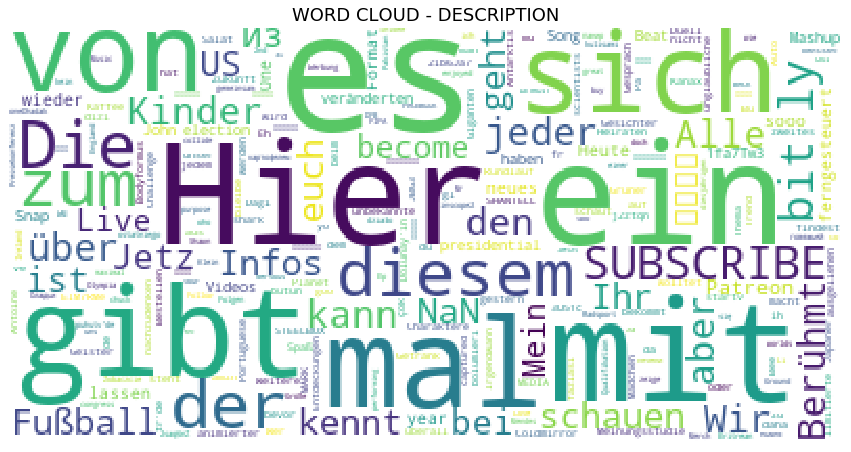

In [33]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
 background_color='white',
 stopwords=stopwords,
 max_words=1200,
 max_font_size=80, 
 random_state=42
                         ).generate(str(df_yt['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()


#### Word Cloud Tags

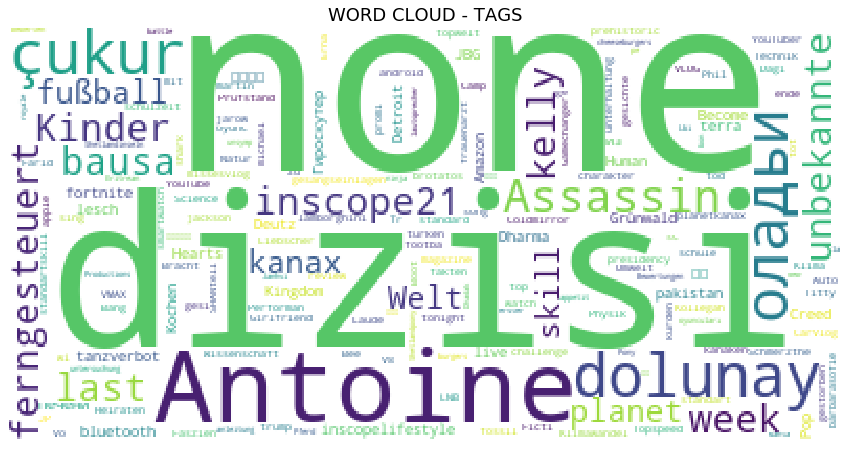

In [34]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
 background_color='white',
 stopwords=stopwords,
 max_words=1200,
 max_font_size=120, 
 random_state=42
                         ).generate(str(df_yt['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()